# BigMart Sales Prediction

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn import *

from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn import linear_model
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

import warnings
np.random.seed(0)
warnings.filterwarnings('ignore')

## Reading the Test and Train CSV Files

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## Data Cleaning and Pre-Processing of Train Dataset

### - Renaming and Analysing the dataset
### - Filling the missing values (if any) using mean for numerical attributes and mode for categorical attributes
### - Ensuring that the values with same meaning are not written in different ways in categorical columns

In [6]:
# Check the missing values if any
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# Summary Statistics
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060.0,NaN,NaN,NaN,12.857645,4.643456,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523.0,NaN,NaN,NaN,0.066132,0.051598,0.0,0.026989,0.053931,0.094585,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523.0,NaN,NaN,NaN,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523.0,NaN,NaN,NaN,1997.831867,8.37176,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# filling the missing values in the Item_Weight column using the Mean value
train['Item_Weight'].fillna(train['Item_Weight'].mean(), inplace = True)

In [9]:
# We know that, the Outlet_size and Outlet_Type are related to each other. So we are filling the missing 
# values of the Outlet_Size by using the values in Outlet_Type.
# mode of the Outlet_size 
mode_of_outlet_size = pd.DataFrame(train.pivot_table(values = 'Outlet_Size', 
                                                     columns = 'Outlet_Type', aggfunc = (lambda x: x.mode())))
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [10]:
# filling the missing values of Outlet_Size with the mode values
train.loc[train['Outlet_Size'].isnull(), 'Outlet_Size'] = train.loc[train['Outlet_Size'].isnull(), 
                                                                    'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [11]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
# creating list of categorical columns for one hot encoding
categorical_columns = [col for col in train.columns if train.dtypes[col] == 'object']

# creating list of numerical columns to standardized data 
numerical_columns = [col for col in train.columns if train.dtypes[col] != 'object']

print('Numerical Features are : ',numerical_columns)
print('Categorical Features are : ',categorical_columns)

Numerical Features are :  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
Categorical Features are :  ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [13]:
unique_categories_count_list = [{col:len(train[col].unique())} for col in categorical_columns]    
unique_categories_count_list

[{'Item_Identifier': 1559},
 {'Item_Fat_Content': 5},
 {'Item_Type': 16},
 {'Outlet_Identifier': 10},
 {'Outlet_Size': 3},
 {'Outlet_Location_Type': 3},
 {'Outlet_Type': 4}]

In [14]:
unique_categories_list = [{col:train[col].unique()} for col in categorical_columns if col != 'Item_Identifier']        
unique_categories_list

[{'Item_Fat_Content': array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)},
 {'Item_Type': array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
         'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
         'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
         'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)},
 {'Outlet_Identifier': array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
         'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)},
 {'Outlet_Size': array(['Medium', 'Small', 'High'], dtype=object)},
 {'Outlet_Location_Type': array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)},
 {'Outlet_Type': array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
         'Supermarket Type3'], dtype=object)}]

In [15]:
# As you can see the low fat and regular in item_fat_content is written differently so first we need to corre
train = train.replace({'Item_Fat_Content': r'^reg'}, 
                      {'Item_Fat_Content': 'Regular'}, regex=True)
train = train.replace({'Item_Fat_Content':[r'Low Fat',r'LF',r'low fat']}, 
                      {'Item_Fat_Content': 'Low Fat'}, regex = True)

In [16]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Similarly, Data Cleaning and Pre-processing of Test Dataset

In [17]:
# Check the missing values if any
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [18]:
# As you can see the low fat and regular in item_fat_content is written differently so first we need to correct it.
train = train.replace({'Item_Fat_Content': r'^reg'}, {'Item_Fat_Content': 'Regular'}, regex=True)
train = train.replace({'Item_Fat_Content':[r'Low Fat',r'LF',r'low fat']}, {'Item_Fat_Content': 'Low Fat'}, regex=True)

In [19]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
# Check the missing values if any
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [21]:
# filling the missing values in the Item_Weight column using the Mean value
test['Item_Weight'].fillna(test['Item_Weight'].mean(), inplace = True)

In [22]:
# mode of the Outlet_size 
mode_of_outlet_size1 = pd.DataFrame(test.pivot_table(values = 'Outlet_Size',
                                                     columns = 'Outlet_Type', aggfunc = (lambda x: x.mode())))
mode_of_outlet_size1

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [23]:
# filling the missing values of Outlet_Size with the mode values
test.loc[test['Outlet_Size'].isnull(), 'Outlet_Size'] = test.loc[test['Outlet_Size'].isnull(), 
                                                                 'Outlet_Type'].apply(lambda x: mode_of_outlet_size1[x])

In [24]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [25]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

## Data Visualisation/ Exploration
## Univariate Plots

Text(0.5, 0, 'Outlet_Type')

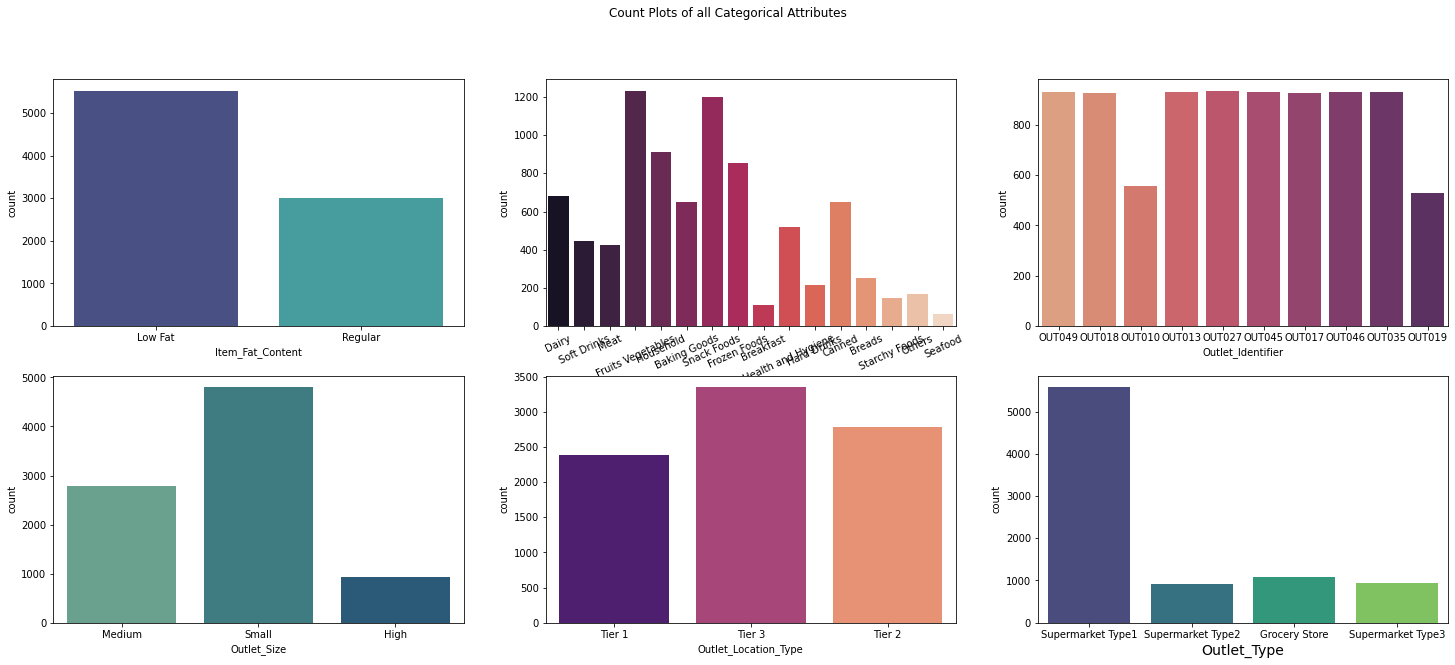

In [51]:
fig, axes = plt.subplots(2, 3, figsize=(25, 10))
fig.suptitle('Count Plots of all Categorical Attributes')
sns.countplot(ax=axes[0, 0], x='Item_Fat_Content' , data=train ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
g1=sns.countplot(ax=axes[0, 1], x='Item_Type' , data=train ,palette='rocket')
g1.set_xticklabels(labels=['Dairy', 'Soft Drinks', 'Meat', 'Fruits Vegetables',
                          'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
                         'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
                         'Breads', 'Starchy Foods', 'Others', 'Seafood'],rotation=25)
plt.xlabel('Item_Type', fontsize=14)
sns.countplot(ax=axes[0, 2], x='Outlet_Identifier' , data=train ,palette='flare')
plt.xlabel('Outlet_Identifier', fontsize=14)
sns.countplot(ax=axes[1, 0], x='Outlet_Size' , data=train ,palette='crest')
plt.xlabel('Outlet_Size', fontsize=14)
sns.countplot(ax=axes[1, 1], x='Outlet_Location_Type' , data=train ,palette='magma')
plt.xlabel('Outlet_Location_Type', fontsize=14)
sns.countplot(ax=axes[1, 2], x='Outlet_Type' , data=train ,palette='viridis')
plt.xlabel('Outlet_Type', fontsize=14)

Categoric columns realizations
- Item_Fat_Content - Most items sold are low fat.
- Item_Type - Item types that are distictly popular are fruits and vegetables and snack foods .
- Outlet_Identifier - Sold items are ditributed evenly among outlets excluding OUT010 and OUT019 that are significanly lower.
- Outlet_Size - Bigmart outlets are mostly medium sized in our data.
- Outlet_Location_Type - The most common type is Tier3 .
- Outlet_Type - By a wide margin the mode outlet type is Supermarket Type1.

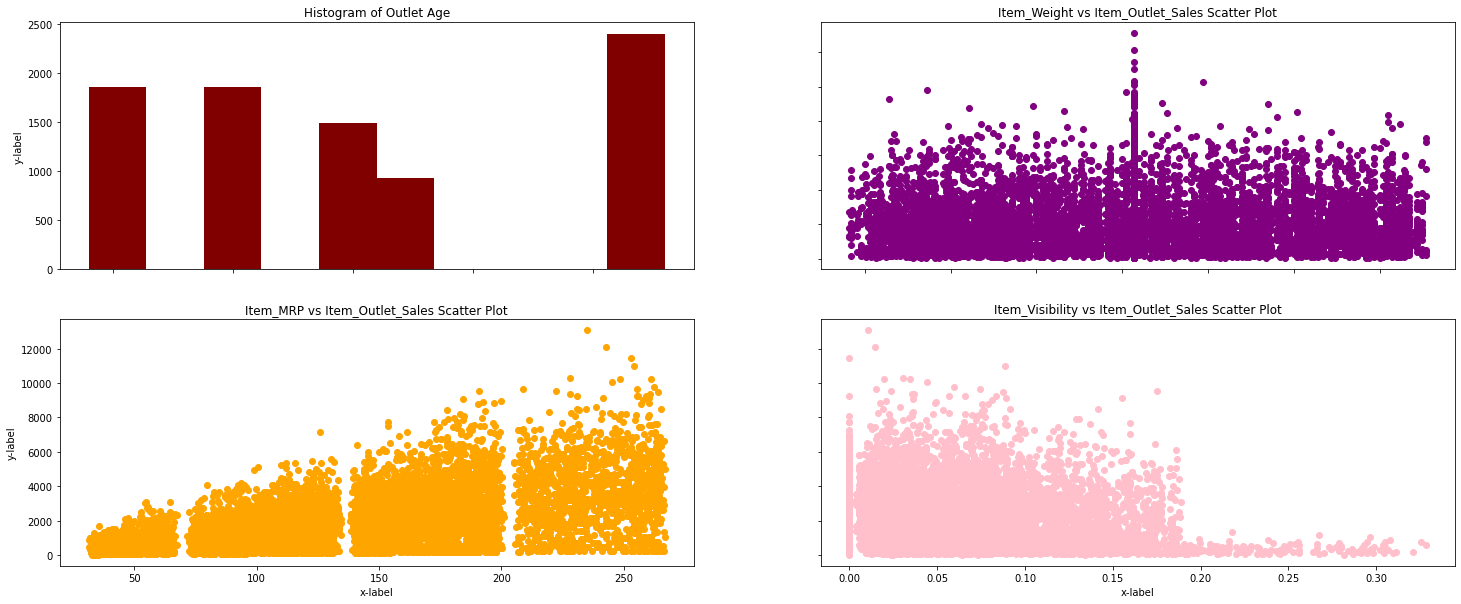

In [27]:
import datetime
today = datetime.date.today()
year = today.year
outlet_age = []
for x in train['Outlet_Establishment_Year']: 
    outlet_age.append(year-x)
fig, axs = plt.subplots(2, 2, figsize=(25, 10))
axs[0, 0].hist(outlet_age, color="maroon")
axs[0, 0].set_title("Histogram of Outlet Age")
axs[0, 1].scatter(train['Item_Weight'], train['Item_Outlet_Sales'], color ="purple")
axs[0, 1].set_title('Item_Weight vs Item_Outlet_Sales Scatter Plot')
axs[1, 0].scatter(train['Item_MRP'], train['Item_Outlet_Sales'], color ="orange")
axs[1, 0].set_title('Item_MRP vs Item_Outlet_Sales Scatter Plot')
axs[1, 1].scatter(train['Item_Visibility'], train['Item_Outlet_Sales'], color ="pink")
axs[1, 1].set_title('Item_Visibility vs Item_Outlet_Sales Scatter Plot')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')
for ax in axs.flat:
    ax.label_outer()

Numeric columns realizations
- Outlet_Age - The most common outlets are 35 years old.
- Item_Weight - The data is very spreaded, no specific pattern.
- Item_Visibility - Appears to be spreaded as well but some concentrationaround the (0,0) indicate small visibility items are not selling well is some cases.
- Item_MRP - Items with higher MRP tend to sell better in most cases.

## Multivariate Plots

To check the following relationships with Item_Outlet_Sales :
Sales per item type,
Sales per outlet type,
Sales per outlet size,
Sales per location type; and Correlation Matrix

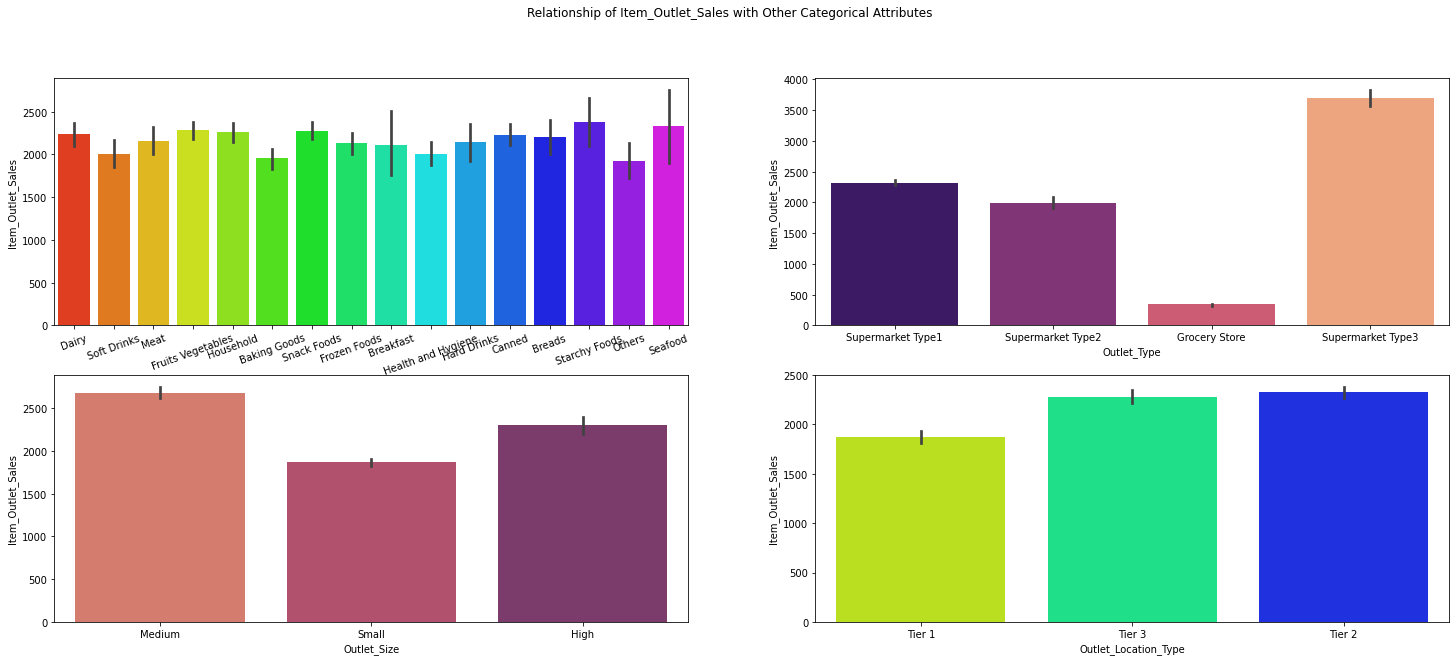

In [48]:
fig, axes = plt.subplots(2, 2, figsize=(25, 10))
fig.suptitle('Relationship of Item_Outlet_Sales with Other Categorical Attributes')
g1=sns.barplot(ax=axes[0, 0], x='Item_Type' ,y='Item_Outlet_Sales', data=train ,palette='gist_rainbow')
g1.set_xticklabels(labels=['Dairy', 'Soft Drinks', 'Meat', 'Fruits Vegetables',
                          'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
                         'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
                         'Breads', 'Starchy Foods', 'Others', 'Seafood'],rotation=20)
g2=sns.barplot(ax=axes[0, 1], x='Outlet_Type' ,y='Item_Outlet_Sales', data=train ,palette='magma')
g3=sns.barplot(ax=axes[1, 0], x='Outlet_Size' ,y='Item_Outlet_Sales', data=train ,palette='flare')
g4=sns.barplot(ax=axes[1, 1], x='Outlet_Location_Type' ,y='Item_Outlet_Sales', data=train ,palette='gist_rainbow')

<AxesSubplot:>

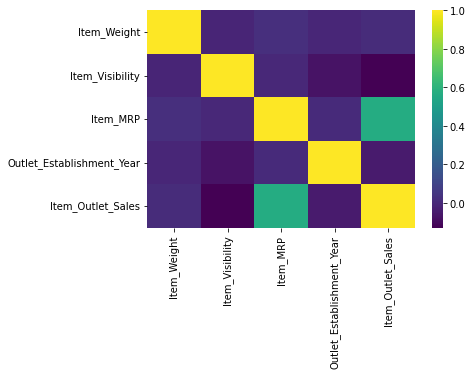

In [53]:
sns.heatmap(train.corr() ,cmap='viridis')

## Label Ecoding, Splitting and Scaling Data

### - All the categoorical columns are encoded using Label Encoding so that it can be properly consumed by the ML models 
### - Set X as all the columns except Item_Outlet_Sales and Y as Item_Outlet_Sales
### - Standardize features by removing the mean and scaling to unit variance.
### - Train-test Split

In [55]:
for i in train.columns:
    if train[i].dtype=='object':
            label_encoder=LabelEncoder()
            train[i]=label_encoder.fit_transform(train[i])

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int32  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int32  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 566.1 KB


In [56]:
X = train.drop(columns='Item_Outlet_Sales', axis=1)
Y = train['Item_Outlet_Sales']

In [57]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=3)

In [59]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (5966, 11) (2557, 11)


## Model Building
### - Store the model in a variable
### - Fit the model using train set
### - Predict using test set
### - Display mean squared error (Evaluation Metric)

## Linear Regression

In [60]:
lin = LinearRegression(normalize=True,fit_intercept= True)
lin.fit(X_train,Y_train)
predlin=lin.predict(X_test)
linmse = mean_squared_error(Y_test, predlin,squared=False)
linmse

1189.2798483760962

## SVM (Support Vector Machine)

In [61]:
svm = LinearSVR()
svm.fit(X_train,Y_train)
predsvm = svm.predict(X_test)
svmse = mean_squared_error(Y_test, predsvm,squared=False)
svmse

1419.0174795756775

## Gradient Boosting Regression


In [62]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,Y_train)
predgbr = gbr.predict(X_test)
gbrmse = mean_squared_error(Y_test, predgbr,squared=False)
gbrmse

1065.6031214655357

## XGBoost

In [63]:
xg = XGBRegressor()
xg.fit(X_train, Y_train)
predxg = xg.predict(X_test)
xgmse = mean_squared_error(Y_test, predxg,squared=False)
xgmse

1174.9307585672818

## Laaso

In [64]:
ls = Lasso(alpha = 0.01)
ls.fit(X_train,Y_train)
prels = ls.predict(X_test)
lsmse = mean_squared_error(Y_test, prels,squared=False)
lsmse

1189.2788335378048

## K Nearest Neighbors

In [65]:
knn = KNeighborsRegressor()
knn.fit(X_train,Y_train)
predknn = knn.predict(X_test)
knnmse = mean_squared_error(Y_test,predknn,squared=False)
knnmse

1157.314645126738

## Random Forest

In [66]:
rfr = RandomForestRegressor(n_estimators=100, random_state=0)
rfr.fit(X_train, Y_train)
predrf = rfr.predict(X_test)
rfrmse = mean_squared_error(Y_test, predrf,squared=False)
rfrmse

1126.9690143073085

## Decision Tree

In [67]:
dt = DecisionTreeRegressor()
dt.fit(X_train, Y_train)
preddt = dt.predict(X_test)
dtmse = mean_squared_error(Y_test,preddt,squared=False)
dtmse

1536.2574373594277

## Ridge Regressor

In [68]:
rid = linear_model.Ridge(alpha=.5)
rid.fit(X_train,Y_train)
predrid = rid.predict(X_test)
ridmse = mean_squared_error(Y_test,predrid,squared=False)
ridmse

1189.2815952858805

## Elastic Net Regression

In [69]:
from sklearn.linear_model import ElasticNet
en = linear_model.ElasticNet()
en.fit(X_train,Y_train)
preden = en.predict(X_test)
enmse = mean_squared_error(Y_test,preden,squared=False)
enmse

1255.2523169243784

## Stochastic Gradient Descent Regression

In [70]:
sgd = linear_model.SGDRegressor()
sgd.fit(X_train,Y_train)
predsgd = sgd.predict(X_test)
sgdmse = mean_squared_error(Y_test,predsgd,squared=False)
sgdmse

1188.5151791733854

## Bayesian Ridge Regression

In [71]:
brr = linear_model.BayesianRidge()
brr.fit(X_train,Y_train)
predbrr = brr.predict(X_test)
brrmse = mean_squared_error(Y_test,predbrr,squared=False)
brrmse

1189.321858611719

## Final Results

In [72]:
res = pd.DataFrame({'Model' : ['LINEAR REGRESSION','SVM','GRADIENT BOOSTING REGRESSOR','XG BOOST','LAASO','K NEAREST NEIGHBOR','RANDOM FOREST'
                               ,'DECISION TREE','RIDGE REGRESSOR','SGD REGRESSOR','BAYESIAN RIDGE REGRESSION'],
                       'Score' : [linmse,svmse,gbrmse,xgmse,lsmse,knnmse,rfrmse,dtmse,ridmse,sgdmse,brrmse]})
res_df = res.sort_values(by='Score',ascending=True)
res_df = res_df.set_index('Score')
res_df

,Model
Score,
1065.603121,GRADIENT BOOSTING REGRESSOR
1126.969014,RANDOM FOREST
1157.314645,K NEAREST NEIGHBOR
1174.930759,XG BOOST
1188.515179,SGD REGRESSOR
1189.278834,LAASO
1189.279848,LINEAR REGRESSION
1189.281595,RIDGE REGRESSOR
1189.321859,BAYESIAN RIDGE REGRESSION


# As we can see that Gradient Boosting Regressor has the least mean squared error, it is the best model for BigMart Sales prediction.

## Predicting the Item Outlet Sales using the Gradient Boosting Regressor 

In [73]:
test['Outlet_Type'] = label_encoder.fit_transform(test[['Outlet_Type']])
test['Outlet_Location_Type'] =label_encoder.fit_transform(test[["Outlet_Location_Type"]])
test['Outlet_Size'] =label_encoder.fit_transform(test[["Outlet_Size"]])
test['Item_Fat_Content'] =label_encoder.fit_transform(test[["Item_Fat_Content"]])
test['Item_Type'] =label_encoder.fit_transform(test[["Item_Type"]])

In [74]:
test.drop('Outlet_Establishment_Year',axis=1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,1,0.007565,13,107.8622,OUT049,1,0,1
1,FDW14,8.300000,4,0.038428,4,87.3198,OUT017,2,1,1
2,NCN55,14.600000,1,0.099575,11,241.7538,OUT010,2,2,0
3,FDQ58,7.315000,1,0.015388,13,155.0340,OUT017,2,1,1
4,FDY38,12.695633,2,0.118599,4,234.2300,OUT027,1,2,3
...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,2,0.013496,13,141.3154,OUT046,2,0,1
5677,FDD47,7.600000,2,0.142991,15,169.1448,OUT018,1,2,2
5678,NCO17,10.000000,1,0.073529,8,118.7440,OUT045,2,1,1
5679,FDJ26,15.300000,2,0.000000,3,214.6218,OUT017,2,1,1


In [75]:
final = pd.DataFrame(data=test ,columns =("Item_Identifier","Outlet_Identifier"))
final.head()

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


In [76]:
tst = test
tst['Item_Identifier'] =label_encoder.fit_transform(tst[["Item_Identifier"]])
tst['Outlet_Identifier'] =label_encoder.fit_transform(tst[["Outlet_Identifier"]])

In [77]:
ios = gbr.predict(tst)

In [78]:
ios

array([7046.15593121, 7036.51091764, 6093.28821557, ..., 7036.51091764,
       7036.51091764, 7036.51091764])

In [79]:
df = pd.DataFrame(data = ios)

In [80]:
final['Item_Outlet_Sales'] = df
final

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,7046.155931
1,FDW14,OUT017,7036.510918
2,NCN55,OUT010,6093.288216
3,FDQ58,OUT017,7036.510918
4,FDY38,OUT027,7754.638537
...,...,...,...
5676,FDB58,OUT046,7046.155931
5677,FDD47,OUT018,7754.638537
5678,NCO17,OUT045,7036.510918
5679,FDJ26,OUT017,7036.510918


In [81]:
dv = final.iloc[:8]
dv

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,7046.155931
1,FDW14,OUT017,7036.510918
2,NCN55,OUT010,6093.288216
3,FDQ58,OUT017,7036.510918
4,FDY38,OUT027,7754.638537
5,FDH56,OUT046,7046.155931
6,FDL48,OUT018,6803.268642
7,FDC48,OUT027,6803.268642


<BarContainer object of 8 artists>

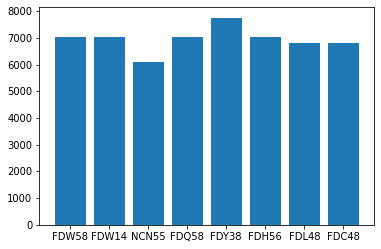

In [83]:
plt.bar(dv['Item_Identifier'],dv['Item_Outlet_Sales'])

In [84]:
final_df = final.sort_values(by='Item_Outlet_Sales')
final_df.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
4983,FDN24,OUT013,4783.886036
2303,FDE24,OUT013,4783.886036
3948,FDW36,OUT013,4935.353698
2931,FDU48,OUT013,4935.353698
3580,FDZ48,OUT013,4935.353698


# As we can see from above dataframe, Outlet OUT049 has the most sales and Item FDX24 had the most sales.